In [1]:
from LaviRot import *
import numpy as np
import scipy as sp
import scipy.linalg as la
import matplotlib.pyplot as plt
from ipywidgets import interact
np.set_printoptions(precision=1, linewidth=300)
%matplotlib inline


In [2]:
E = 203e9
Gs = 78.12e9
rho = 7860

In [3]:
si_d = 0
so_d = 0.1016
cte = 28665*(10**(-5))

In [4]:
L =     [0.37*cte, 
         0.35*cte,
         0.32*cte, 
         0.84*cte,
         0.17*cte,
         0.13*cte,
         0.17*cte,
         0.18*cte,
         0.38*cte,
         0.46*cte,
         0.31*cte,
         0.38*cte,
         0.31*cte,
         0.10*cte,
         0.32*cte,
         0.12*cte]

In [5]:
nelem = [x for x in range(len(L))]

In [6]:
shaft_elem = [ShaftElement(n, l, si_d, so_d, E, Gs, rho,
                           shear_effects=True,
                           rotary_inertia=True,
                           gyroscopic=True) for n, l in zip(nelem, L)]

In [7]:
shaft_elem1 = shaft_elem[0]

In [8]:
colar = DiskElement(14,rho, cte*0.10, so_d, cte*0.54)
disk0 = DiskElement(5, rho, cte*0.17, so_d, cte*0.62)
disk1 = DiskElement(7, rho, cte*0.17, so_d, cte*0.62)
disk2 = DiskElement(9, rho, cte*0.38, so_d, cte*1.02)

In [9]:
kx0 = 1.27106e8
ky0 = 1.23604e8
cx0 = 1.33615e8
cy0 = 1.31591e8
kx1 = 1.28980e8
ky1 = 1.24296e8
cx1 = 1.34763e8
cy1 = 1.32003e8
bearing0 = BearingElement(2, kxx=kx0,cxx=cx0,kyy=ky0,cyy=cy0)
bearing1 = BearingElement(12,kxx=kx1,cxx=cx1,kyy=ky1,cyy=cy1)

In [10]:
turbine = Rotor(shaft_elem,
                   [colar, disk0, disk1, disk2],
                   [bearing0, bearing1])

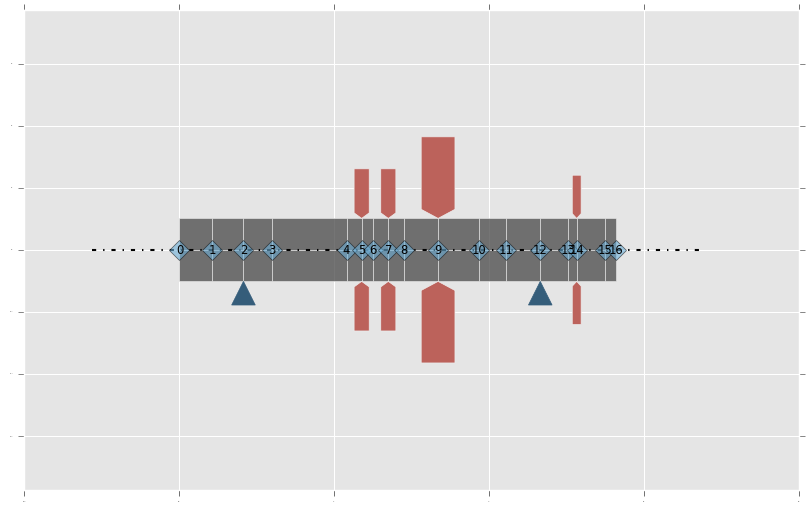

In [11]:
plot_rotor(turbine)

In [12]:
speed = np.linspace(0, 3500, 10)

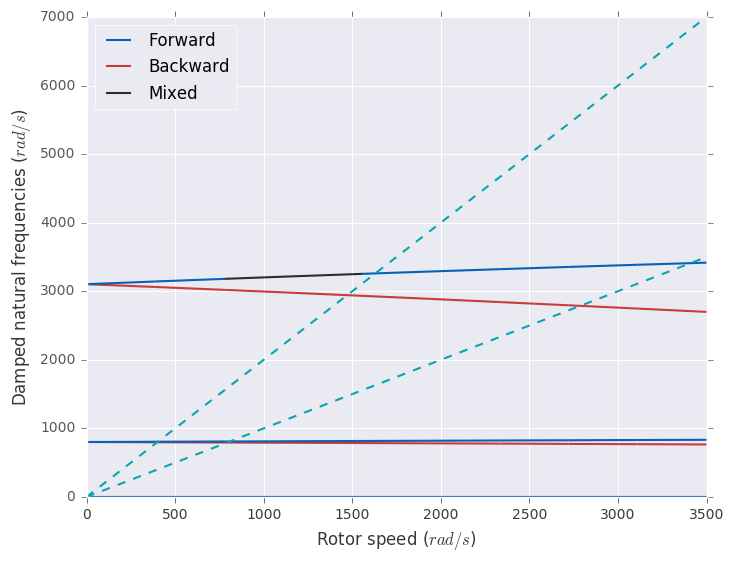

In [13]:
campbell(turbine, speed, mult=[1, 2])

In [14]:
M = turbine.M()
G = turbine.G()
C = turbine.C()
K = turbine.K()

In [15]:
n=0
M0 = M[n*4:n*4+4,n*4:n*4+4]
K0 = K[n*4:n*4+4,n*4:n*4+4]
G0 = G[n*4:n*4+4,n*4:n*4+4]
C0 = C[n*4:n*4+4,n*4:n*4+4]

In [16]:
I = sp.eye(len(M0))
Z = sp.zeros_like(M0)
Minv = la.inv(M0)

In [17]:

def q0(w):
    bw = []
    fw2 = []
    bw2 = []
    for w in omega:
        A = sp.vstack([sp.hstack([        Z,                 I]),
                       sp.hstack([-Minv @ K0, -Minv @ (G0*w + C0)])])
        evalues, evects = la.eig(A)
        evalues = sp.sort(evalues.imag)
        wn = (sp.absolute(evalues))
        bw.append(wn[4])
        fw.append(wn[5])
        bw2.append(wn[6])
        fw2.append(wn[7])

In [18]:
plt.plot(omega, bw)
plt.plot(omega, fw)
plt.plot(omega, bw2)
plt.plot(omega, fw2)
#plt.plot(Omega, Omega)

NameError: name 'omega' is not defined